In [1]:
import pandas as pd
import nltk

In [2]:
# reviews = pd.read_csv('dataset/small_corpus.csv')
reviews = pd.read_csv('dataset/big_corpus.csv')

/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"11 14, 2017",A2S0DNFORGLLVS,B00SRZH210,Hugglebuns,It's a game that can be hit or miss to some pe...,Five Stars,1510617600,NaN,NaN,NaN
1,4.0,True,"11 26, 2012",A24GQAPXMDZT0K,B005VBVQBU,Amazon Customer,Got this for a good price. The included 2 game...,Good price,1353888000,NaN,NaN,NaN
2,5.0,True,"02 12, 2018",A3QRDVFDQEAA9I,B00SXEOMWW,ENIER RODRIGUEZ,Muy bien,Five Stars,1518393600,NaN,{'Format:': ' Video Game'},NaN
3,1.0,False,"06 10, 2007",A2UYHZP2YBY7BQ,B000AB0RF2,Lewis N. Harris,I ordered this recharging dock from Amazon (no...,Product pictured is not Product shipped,1181433600,2,NaN,NaN
4,5.0,True,"04 16, 2017",A3ABGWY1QXVGSN,B01GW3OMMK,K-TRAIN,Love it!!,Five Stars,1492300800,NaN,"{'Edition:': ' Standard', 'Platform:': ' Xbox ...",NaN


In [4]:
reviews.tail()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
199995,3.0,True,"06 15, 2011",A2PJ20JIGVGK3N,B0012RCNUA,O. Ortiz,This is actually a really good collection of g...,An Insult to Arcade Fans Because of a Fatal Flaw,1308096000,5.0,{'Platform:': ' PlayStation2'},NaN
199996,1.0,False,"05 10, 2012",A2RVVOBD3SG56S,B000YDIA78,Nicholas R. Kuehnast,I had this keyboard and wanted so badly to lov...,Keys just don't respond,1336608000,NaN,{'Style:': ' Standard Edition'},NaN
199997,4.0,True,"12 29, 2009",A2FJEW1A5AU7TK,B000QGHPRY,Robert S. Berner,My six year old uses this case for his nintend...,Good carry case for young child,1262044800,NaN,NaN,NaN
199998,5.0,True,"10 31, 2014",A1B5S1Y8AEA7Q2,B00HGLLRV2,Tyrone S Waldner,"Lovely, just lovely",Five Stars,1414713600,NaN,{'Edition:': ' Standard'},NaN
199999,5.0,True,"01 20, 2016",A1ZUR4TYZUQ30X,B00JF63SQI,Sarah A Queckborner,Exactly what he wanted.,Five Stars,1453248000,NaN,{'Style:': ' DeathAdder Chroma'},NaN


In [5]:
reviews.sample(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
196040,5.0,True,"09 5, 2015",A21LV9FW0LE1ZA,B00I2L23HM,aubrey Hebert,Absolutely perfect!,Five Stars,1441411200,NaN,NaN,NaN
159996,5.0,True,"07 4, 2009",A31RRM4ZR6ZF8O,B00000ID61,Clinton,I'd played this game a little when it first ca...,Blast From The Past,1246665600,NaN,NaN,NaN
17479,5.0,True,"03 7, 2017",A1M1Y1VMXQGTEE,B017S3OPZM,Juan,My body is ready.,AWWWW YEAHHH,1488844800,6,"{'Edition:': ' Standard', 'Platform:': ' PlayS...",NaN
17012,1.0,True,"01 24, 2015",AKED9DD6A1SWC,B000PT18OS,Hayley,Does not work and electrocutes you,Don't buy,1422057600,NaN,NaN,NaN
16071,2.0,False,"09 30, 2001",A2EM8JST71Q05A,B00004UDVL,W. Revis,Grandia II is a beautiful game - in much the s...,Technically excellent game is mired by clueles...,1001808000,2,NaN,NaN
185198,5.0,True,"04 9, 2015",A2FCKKVSTPXEQ8,B00CX9L30W,pattywagon,ugh im addicted worse than i have been since E...,more addicting than EQ1,1428537600,NaN,{'Format:': ' Software Download'},NaN
50266,5.0,True,"12 24, 2016",A2IFYCCXW8AE14,B01EZA0DEI,Jason Bennetsen,Fast shipping and a good deal for this game.,Five Stars,1482537600,NaN,"{'Edition:': ' Legacy', 'Platform:': ' Xbox One'}",NaN
35424,5.0,True,"03 1, 2013",A1OPI4BPAUJBM6,B0050SYX8W,Grace J. Painter,"ordered this some time ago, but the kids and g...",Halo 4,1362096000,NaN,{'Format:': ' Video Game'},NaN
42013,2.0,True,"02 21, 2012",A1OENUXQFHO3SN,B005FAH5EY,45thParallel,This game is creative and was fun to play. Ho...,Bug Fixed Needed to Play With Windows 7,1329782400,7,NaN,NaN
109609,5.0,True,"01 30, 2017",A1ATQL3BGGLOMK,B00IG3GSQ8,ACGRamos,Good,Five Stars,1485734400,NaN,NaN,NaN


In [6]:
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
import string

In [7]:
tb_tokenizer = TreebankWordTokenizer()

In [8]:
reviews['rev_text_lower'] = reviews['reviewText'].apply(lambda rev: str(rev)
                                                        .translate(str.maketrans('', '', punctuation))
                                                        .replace('<br />', ' ')
                                                        .lower())

In [9]:
reviews[['reviewText', 'rev_text_lower']].sample(5)

,reviewText,rev_text_lower
14852,"AS FAR AS PLAYSTATION ONE GAMES GO, THIS GAME ...",as far as playstation one games go this game i...
82373,Beyond excellent quality! Super impressed with...,beyond excellent quality super impressed with ...
193499,Single player is a great upgrade from SC1 but ...,single player is a great upgrade from sc1 but ...
156095,Good times game,good times game
49101,This was a good spin on the movies. This was a...,this was a good spin on the movies this was a ...


In [10]:
reviews['tb_token'] = reviews['rev_text_lower'].apply(lambda rev: tb_tokenizer.tokenize(str(rev)))

In [11]:
reviews[['reviewText', 'tb_token']].sample(5)

,reviewText,tb_token
125947,Just as expected. Fine product.,"[just, as, expected, fine, product]"
170122,loved it,"[loved, it]"
140873,"We have 2 girls, 4 and 8 years old. As a fami...","[we, have, 2, girls, 4, and, 8, years, old, as..."
103244,Its the Ratchet and Clank you remember and for...,"[its, the, ratchet, and, clank, you, remember,..."
169204,"I would like to start off by saying, I am a hu...","[i, would, like, to, start, off, by, saying, i..."


In [12]:
from nltk.tokenize.casual import casual_tokenize

In [13]:
reviews['casual_tokens'] = reviews['rev_text_lower'].apply(lambda rev: casual_tokenize(str(rev)))

In [14]:
reviews[['reviewText', 'casual_tokens', 'tb_token']].sample(5)

,reviewText,casual_tokens,tb_token
151458,Overall a large set of headphones. Nice foam p...,"[overall, a, large, set, of, headphones, nice,...","[overall, a, large, set, of, headphones, nice,..."
22237,"Lots of characters, lots of different backgrou...","[lots, of, characters, lots, of, different, ba...","[lots, of, characters, lots, of, different, ba..."
101009,Diablo 3 is actually really fun. First time pl...,"[diablo, 3, is, actually, really, fun, first, ...","[diablo, 3, is, actually, really, fun, first, ..."
157324,"New and as advertised, so no complaint.\nBe aw...","[new, and, as, advertised, so, no, complaint, ...","[new, and, as, advertised, so, no, complaint, ..."
116276,"Great game, very cool.","[great, game, very, cool]","[great, game, very, cool]"


Stemming

In [15]:
from nltk.stem.porter import PorterStemmer

In [16]:
stemmer = PorterStemmer()

In [17]:
reviews['tokens_stemmed'] = reviews['tb_token'].apply(lambda words: [stemmer.stem(word) for word in words])

In [18]:
reviews[['tb_token', 'tokens_stemmed']].sample(5)

,tb_token,tokens_stemmed
86868,"[pretty, good, basic, usb, controller, straigh...","[pretti, good, basic, usb, control, straight, ..."
139688,"[to, start, let, me, say, that, i, loved, diab...","[to, start, let, me, say, that, i, love, diabl..."
58341,"[best, investment, for, someone, whos, always,...","[best, invest, for, someon, who, alway, on, th..."
14698,"[this, game, was, an, impulse, buy, from, a, s...","[thi, game, wa, an, impuls, buy, from, a, stor..."
148904,[garbage],[garbag]


Lemmatisation

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

In [20]:
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [21]:
lemmatizer = WordNetLemmatizer()

def get_lemmas(tokens):
    lemmas = []
    for token in tokens:
        pos = penn_to_wn(pos_tag([token])[0][1])
        if pos:
            lemma = lemmatizer.lemmatize(token, pos)
            if lemma:
                lemmas.append(lemma)
    return lemmas

In [22]:
reviews['lemmas'] = reviews['tb_token'].apply(lambda tokens: get_lemmas(tokens))

In [23]:
reviews[['reviewText', 'tokens_stemmed', 'lemmas']].sample(5)

,reviewText,tokens_stemmed,lemmas
92929,Got this a a gift for the nephew's and they ca...,"[got, thi, a, a, gift, for, the, nephew, and, ...","[get, gift, nephew, hear, enemy, other, side, ..."
99645,Returned,[return],[return]
90615,I absolutely LOVE heroes of Might and Magic ga...,"[i, absolut, love, hero, of, might, and, magic...","[i, absolutely, love, hero, magic, game, be, u..."
32214,"After one month my 2DS froze, up to this point...","[after, one, month, my, 2d, froze, up, to, thi...","[month, froze, up, point, i, thought, be, fine..."
21103,We own and have played hundreds of rpg games. ...,"[we, own, and, have, play, hundr, of, rpg, gam...","[own, have, played, hundred, rpg, game, old, w..."


Sentiment

In [24]:
def get_sentiment_score(tokens):
    score = 0
    tags = pos_tag(tokens)
    for word, tag in tags:
        wn_tag = penn_to_wn(tag)
        if not wn_tag:
            continue
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets:
            continue
            
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        
        score += (swn_synset.pos_score() - swn_synset.neg_score())
        
    return score

In [25]:
swn.senti_synset(wn.synsets('perfect', wn.ADJ)[0].name()).pos_score()

0.625

In [26]:
reviews['sentiment_score'] = reviews['lemmas'].apply(lambda tokens: get_sentiment_score(tokens))

In [27]:
reviews[['reviewText', 'lemmas', 'sentiment_score']].sample(5)

,reviewText,lemmas,sentiment_score
109778,Personally it sucked because the instructions ...,"[personally, suck, instruction, window, ask, g...",0.375
164429,i got this for christmas in 2002 and this thin...,"[i, get, christmas, thing, be, still, work, be...",1.250
89928,"I'm a fan of the old Max Payne games, and of c...","[im, fan, old, max, payne, game, course, have,...",6.500
144121,Absolutely love this product! The mask is much...,"[absolutely, love, product, mask, be, much, la...",2.750
199714,the case is sturdy and it has 3 compartments t...,"[case, be, sturdy, have, compartment, hold, ga...",-0.375


In [28]:
reviews[['reviewText', 'lemmas', 'sentiment_score']].sample(10)

,reviewText,lemmas,sentiment_score
181913,Very Good,"[very, good]",0.750
174119,got this for my 6 years old granddaughter its ...,"[get, year, old, granddaughter, just, right, s...",0.250
8460,My 5 year old LOVES playing this game! I love...,"[year, old, love, play, game, i, love, be, eas...",2.375
60521,Excellent,[excellent],0.000
60355,If there was a Hall of Fame for all time bad r...,"[there, be, hall, fame, time, bad, racer, cras...",-0.750
154067,When it works it works very well. Had to get t...,"[work, work, very, well, have, get, origional,...",0.000
128814,When I played Kane and Lynch Dead Men I was ca...,"[i, played, kane, lynch, dead, men, i, be, cau...",6.000
194121,Didn't let me download the extra content which...,"[didnt, let, download, extra, content, be, ann...",0.875
57911,When I get a game I MAKE sure it will have Xbo...,"[i, get, game, i, make, sure, have, xbox, live...",0.125
38649,Very nice gaming headset for the price! Save y...,"[very, nice, game, headset, price, save, money...",1.750


In [29]:
from sklearn.feature_extraction.text import CountVectorizer 

In [30]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rev_text_lower,tb_token,casual_tokens,tokens_stemmed,lemmas,sentiment_score
0,5.0,True,"11 14, 2017",A2S0DNFORGLLVS,B00SRZH210,Hugglebuns,It's a game that can be hit or miss to some pe...,Five Stars,1510617600,NaN,NaN,NaN,its a game that can be hit or miss to some peo...,"[its, a, game, that, can, be, hit, or, miss, t...","[its, a, game, that, can, be, hit, or, miss, t...","[it, a, game, that, can, be, hit, or, miss, to...","[game, be, hit, miss, people, hit, change, life]",0.125
1,4.0,True,"11 26, 2012",A24GQAPXMDZT0K,B005VBVQBU,Amazon Customer,Got this for a good price. The included 2 game...,Good price,1353888000,NaN,NaN,NaN,got this for a good price the included 2 games...,"[got, this, for, a, good, price, the, included...","[got, this, for, a, good, price, the, included...","[got, thi, for, a, good, price, the, includ, 2...","[get, good, price, include, game, be, great, w...",0.875
2,5.0,True,"02 12, 2018",A3QRDVFDQEAA9I,B00SXEOMWW,ENIER RODRIGUEZ,Muy bien,Five Stars,1518393600,NaN,{'Format:': ' Video Game'},NaN,muy bien,"[muy, bien]","[muy, bien]","[muy, bien]","[muy, bien]",0.000
3,1.0,False,"06 10, 2007",A2UYHZP2YBY7BQ,B000AB0RF2,Lewis N. Harris,I ordered this recharging dock from Amazon (no...,Product pictured is not Product shipped,1181433600,2,NaN,NaN,i ordered this recharging dock from amazon not...,"[i, ordered, this, recharging, dock, from, ama...","[i, ordered, this, recharging, dock, from, ama...","[i, order, thi, recharg, dock, from, amazon, n...","[i, order, recharge, dock, amazon, not, market...",-3.750
4,5.0,True,"04 16, 2017",A3ABGWY1QXVGSN,B01GW3OMMK,K-TRAIN,Love it!!,Five Stars,1492300800,NaN,"{'Edition:': ' Standard', 'Platform:': ' Xbox ...",NaN,love it,"[love, it]","[love, it]","[love, it]",[love],0.625


In [31]:
reviews = reviews.dropna()

In [32]:
reviews.shape

(381, 18)

In [33]:
vectorizer = CountVectorizer(stop_words='english')

In [34]:
doc_term_data = vectorizer.fit_transform(reviews['reviewText'])
doc_term_data

<381x6558 sparse matrix of type '<class 'numpy.int64'>'
	with 25100 stored elements in Compressed Sparse Row format>

In [35]:
doc_term_data.shape

(381, 6558)

In [36]:
from sklearn.decomposition import NMF

In [37]:
nmf_model = NMF(15)
doc_topic = nmf_model.fit_transform(doc_term_data)

/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [38]:
doc_topic_df = pd.DataFrame(doc_topic, index=reviews.index)

In [39]:
doc_topic_df['reviews'] = reviews['reviewText']

In [40]:
doc_topic_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,reviews
19,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780,I've had a pair of these for a little over six...
296,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340,Looks great! Feels great!...I highly recommend it
1890,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000,We are absolutely in love with this Pyrus wire...
2573,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049,My TV inputs change on their own during gamepl...
3142,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507,I got DriveClub on 12/6 so my experience with ...


In [41]:
doc_topic_df.shape

(381, 16)

In [42]:
doc_topic_df.sort_values(0,ascending=False).head(5).reviews.values

array(['Fallout 3 represents Bethesda Softworks\' first take of the legendary game franchise since they purchased the rights from the failing Interplay in 2004. So, how did Bethesda do? In essence, Fallout 3 is Oblivion (Bethesda\'s most well-known game) with a sci-fi/post-apocalyptic skin on it. The Good, Bad, and Ugly on this game includes...\n\nGood:\n- Spectacular Graphics (I\'d have said beautiful, but we ARE talking about a post-apocalyptic world here). From blown-up highway overpasses to angry super mutants, players will be completely visually immersed in the game.\n- Massive World. Fallout 3 is not a "first ten hours and you\'re done" game. The developers have said that F3 contains over 100 hours of game play if all of the side quests are done and, having played a good portion of them, I can say that this seems to be correct.\n- Interesting World. There\'s a lot to see and do in post-war D.C.! Visit the Washington Monument, try and find historical documents, join a cult, stop s

In [43]:
nmf_model.components_

array([[0.04392237, 0.        , 0.        , ..., 0.        , 0.08212844,
        0.00738386],
       [0.        , 0.26441035, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00104678, 0.        , 0.00179409, ..., 0.        , 0.        ,
        0.00067617],
       ...,
       [0.        , 0.        , 0.        , ..., 0.13513019, 0.        ,
        0.00094648],
       [0.        , 0.        , 0.        , ..., 0.05891623, 0.02449735,
        0.00145601],
       [0.00534157, 0.45494554, 0.01488919, ..., 0.        , 0.        ,
        0.        ]])

In [44]:
nmf_model.components_.shape

(15, 6558)

In [45]:
topic_term = pd.DataFrame(nmf_model.components_, columns=vectorizer.get_feature_names()).T

/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
topic_term.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
00,0.043922,0.000000,0.001047,0.000000,0.000000,0.000000,0.003023,0.003181,0.030552,0.002549,0.140517,0.019413,0.000000,0.0,0.005342
000,0.000000,0.264410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.454946
00630200,0.000000,0.000000,0.001794,0.000000,0.004155,0.000000,0.000000,0.000000,0.001124,0.000000,0.006298,0.002041,0.000000,0.0,0.014889
01,0.008039,0.000143,0.001757,0.000000,0.001113,0.001096,0.000453,0.000375,0.000000,0.000404,0.000000,0.001678,0.000449,0.0,0.000424
01jkrbmzqts,0.000000,0.000000,0.000000,0.000584,0.000000,0.000000,0.000000,0.000000,0.006008,0.000000,0.000000,0.000000,0.016266,0.0,0.001389


In [47]:
topic_term.sort_values(0,ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926
fallout,1.345256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
like,1.094261,0.191192,0.853499,0.157921,0.222361,1.059788,0.051734,1.461705,0.568961,0.535095,0.956054,0.092109,0.477029,3.021121,0.390267
played,0.921237,0.000000,0.000000,0.671721,0.142144,0.000000,0.326150,0.146943,0.000000,0.020256,0.016157,0.182465,0.217196,0.033032,0.000000
good,0.918095,0.339462,1.174726,0.543794,1.232696,0.295150,0.335405,0.243374,0.062668,0.144776,0.494858,0.000000,0.057232,0.398761,0.459792
world,0.791926,0.000000,0.019951,0.141781,0.010652,0.000000,0.289128,0.114733,0.000000,0.135614,0.000000,0.000000,0.030283,0.125478,0.132037
characters,0.770092,0.000000,0.000000,0.008622,0.000000,0.000000,1.122985,1.510810,0.138300,0.000000,0.000000,0.000000,0.288101,0.000000,0.000000
mission,0.741668,0.000000,0.000000,0.000000,0.000000,0.000000,0.291984,0.000000,0.000000,0.112703,0.000000,0.000000,0.000000,0.201070,0.000000
fun,0.717208,0.023792,0.000000,0.000000,0.000000,0.195462,0.364778,0.021328,0.000000,0.032118,0.045042,0.000000,0.117889,0.285118,0.000000
play,0.676322,0.227981,0.257209,0.240081,0.000000,0.423334,1.687091,1.121045,0.045352,0.784679,0.547882,0.060171,0.276279,0.637925,0.005428


In [48]:
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[['game', 'fallout', 'like', 'played', 'good', 'world'],
 ['mouse', 'software', 'button', 'buttons', 'grip', 'used'],
 ['headphones', 'sound', 'quality', 'set', 'movies', 'good'],
 ['kingdom', 'hearts', 'games', 'game', 'final', 'dream'],
 ['headset', 'pro', 'mic', 'mobile', 'pc', 'gaming'],
 ['sims', 'sim', 'game', 'new', 'like', 'expected'],
 ['game', 'level', 'story', 'character', 'play', 'mode'],
 ['game', 'character', 'characters', 'like', 'mortal', 'kombat'],
 ['keys', 'key', 'keyboard', 'feel', 'cherry', 'mx'],
 ['warriors', 'game', 'orochi', 'games', 'different', 'play'],
 ['controller', 'buttons', 'controllers', 'original', 'like', 'cradle'],
 ['adapter', 'guitar', 'instruments', 'xbox', 'old', 'just'],
 ['ce', 'case', 'box', 'edition', 'getting', 'price'],
 ['like', 'really', 'just', 'don', 'time', 'story'],
 ['mouse', 'gaming', 'use', 'buttons', 'programmable', 'link']]

In [49]:
ex_label = [e[:30]+"..." for e in doc_topic_df.reviews]

In [50]:
doc_topic_nmf = pd.DataFrame(doc_topic,
                             index=ex_label,
                             columns = ['component_1', 'component_2','component_3','component_4',
                                        'component_5','component_6','component_7','component_8',
                                        'component_9','component_10','component_11','component_12',
                                        'component_13','component_14','component_15'])
doc_topic_nmf

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15
I've had a pair of these for a...,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780
Looks great! Feels great!...I ...,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340
We are absolutely in love with...,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000
My TV inputs change on their o...,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049
I got DriveClub on 12/6 so my ...,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I can't connect my Sony xb950b...,0.000000,0.001141,0.039285,0.000000,0.000000,0.000000,0.020762,0.000000,0.009607,0.000000,0.003922,0.004492,0.000000,0.000000,0.000000
Poor! Just opened this gift I ...,0.000000,0.000594,0.006725,0.000000,0.001746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027987,0.025910,0.038593,0.000000
I have received the k70 keyboa...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055047,0.000000,0.000000,0.000000,0.000000,0.000000,0.002539
I play WOW and ArcheAge and I ...,0.000000,0.372301,0.044884,0.000000,0.008704,0.011463,0.000000,0.000000,0.114133,0.004258,0.090490,0.020590,0.038825,0.236235,0.298418


In [51]:
from sklearn.metrics import pairwise_distances

In [52]:
pairwise_distances(doc_topic[0].reshape(1,-1),doc_topic,metric='cosine').argsort()

array([[  0, 163, 164, 144, 240, 160, 134, 337,  58, 290,  23, 245, 254,
        291, 124, 141,  64,  90, 374, 287, 212, 191, 125,  87, 116, 314,
         81,  38,  47,  27,  75,  91, 128, 197, 259, 145,  76, 106, 201,
        140,   6, 274, 222, 331, 203, 167, 376,  50, 170, 179, 335, 355,
        138, 196, 152, 352, 326, 364, 375, 308, 113, 300, 277,  56,  69,
        157, 188, 251,  20,  22,   3, 340,   8, 131, 268, 221, 159, 380,
         44,  98, 341,  36, 302, 176,  96, 256,  14, 367, 155, 238,  61,
        119,  19, 377, 133, 151, 239, 158,  32, 161,  31, 112, 247, 271,
         13, 297, 168,  11,  88, 288, 370,  80, 249, 193, 136, 292, 252,
        349, 232, 334,  74,  53,  30, 246, 368, 142, 149, 293, 236, 371,
        228, 199, 327, 231,  94, 332, 347, 175,  35, 346, 279,  86,  48,
        150, 235,  24, 189, 182, 105, 311, 285, 338, 356, 257,  59, 316,
        205, 132, 278, 379, 192,  66,  25, 190, 111, 343,   4, 223,  42,
        276, 286, 130, 318,  68, 325,   9, 208, 265

In [53]:
doc_topic_nmf

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15
I've had a pair of these for a...,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780
Looks great! Feels great!...I ...,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340
We are absolutely in love with...,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000
My TV inputs change on their o...,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049
I got DriveClub on 12/6 so my ...,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I can't connect my Sony xb950b...,0.000000,0.001141,0.039285,0.000000,0.000000,0.000000,0.020762,0.000000,0.009607,0.000000,0.003922,0.004492,0.000000,0.000000,0.000000
Poor! Just opened this gift I ...,0.000000,0.000594,0.006725,0.000000,0.001746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027987,0.025910,0.038593,0.000000
I have received the k70 keyboa...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055047,0.000000,0.000000,0.000000,0.000000,0.000000,0.002539
I play WOW and ArcheAge and I ...,0.000000,0.372301,0.044884,0.000000,0.008704,0.011463,0.000000,0.000000,0.114133,0.004258,0.090490,0.020590,0.038825,0.236235,0.298418


In [54]:
review_topic_matrix = doc_topic_df

In [55]:
review_topic_matrix = review_topic_matrix.add_prefix('topic_')

In [56]:
review_topic_matrix.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_reviews
19,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780,I've had a pair of these for a little over six...
296,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340,Looks great! Feels great!...I highly recommend it
1890,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000,We are absolutely in love with this Pyrus wire...
2573,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049,My TV inputs change on their own during gamepl...
3142,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507,I got DriveClub on 12/6 so my experience with ...


In [58]:
words

['00',
 '000',
 '00630200',
 '01',
 '01jkrbmzqts',
 '03',
 '05',
 '07',
 '08',
 '0805',
 '09',
 '10',
 '100',
 '1000',
 '100kb',
 '103',
 '104',
 '108',
 '1080p',
 '11',
 '110',
 '111',
 '119',
 '11monts',
 '12',
 '120',
 '120gb',
 '123',
 '129',
 '13',
 '130',
 '139',
 '14',
 '149',
 '15',
 '150',
 '16',
 '160',
 '1600',
 '16400',
 '169',
 '16bit',
 '16gb',
 '17',
 '170',
 '171',
 '1770',
 '17lbs',
 '18',
 '18th',
 '18wos',
 '190mb',
 '199',
 '1991',
 '1992',
 '1995',
 '1gb',
 '1st',
 '1v1',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2007',
 '2008',
 '2009',
 '200max',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '20feets',
 '20gb',
 '21',
 '2100',
 '21st',
 '22nd',
 '24',
 '24bit',
 '25',
 '250',
 '255',
 '258',
 '26',
 '27',
 '2700',
 '28',
 '280',
 '29',
 '2d',
 '2ds',
 '2gb',
 '2h',
 '2k',
 '2k16',
 '2nd',
 '30',
 '300',
 '3004690344',
 '300s',
 '302',
 '303',
 '30x',
 '31',
 '310',
 '32',
 '320mb',
 '32gb',
 '34',
 '350',
 '358',
 '3

In [59]:
word_topic_matrix = pd.DataFrame(nmf_model.components_, columns=words).T.add_prefix('topic_')

In [60]:
nmf_model.components_

array([[0.04392237, 0.        , 0.        , ..., 0.        , 0.08212844,
        0.00738386],
       [0.        , 0.26441035, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00104678, 0.        , 0.00179409, ..., 0.        , 0.        ,
        0.00067617],
       ...,
       [0.        , 0.        , 0.        , ..., 0.13513019, 0.        ,
        0.00094648],
       [0.        , 0.        , 0.        , ..., 0.05891623, 0.02449735,
        0.00145601],
       [0.00534157, 0.45494554, 0.01488919, ..., 0.        , 0.        ,
        0.        ]])

In [61]:
word_topic_matrix.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
00,0.043922,0.000000,0.001047,0.000000,0.000000,0.000000,0.003023,0.003181,0.030552,0.002549,0.140517,0.019413,0.000000,0.0,0.005342
000,0.000000,0.264410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.454946
00630200,0.000000,0.000000,0.001794,0.000000,0.004155,0.000000,0.000000,0.000000,0.001124,0.000000,0.006298,0.002041,0.000000,0.0,0.014889
01,0.008039,0.000143,0.001757,0.000000,0.001113,0.001096,0.000453,0.000375,0.000000,0.000404,0.000000,0.001678,0.000449,0.0,0.000424
01jkrbmzqts,0.000000,0.000000,0.000000,0.000584,0.000000,0.000000,0.000000,0.000000,0.006008,0.000000,0.000000,0.000000,0.016266,0.0,0.001389


Topic Interpretation

In [62]:
for review in review_topic_matrix.sort_values(by='topic_1', ascending=False).head(10)['topic_reviews'].values:
    print(review)
    print()

To start off, before this mouse in the past two years I've used the Razer Naga 2012, 2014, Utech Smart mmo mouse, Sharkk MMO mouse, and Logitech G502 Proteus Core. I wanted to list these so you know what I'm comparing my personal experiences to. I bought this mouse, and have been using it for a few days now and here is my initial reaction, it will be updated it things change.

Packaging: (for the few that care)
It comes in a very professional and organized packaging with your mouse, a carrying case for your spare mouse grip and changeable button sets. It also comes with your instructions which you shouldn't need to set up the mouse.

Installation:
This has been one of the smoothest installations I've done. I plugged in the mouse for a driver updates, went to their website to install the Swarm software, updated it and then I was ready to go. I had a hiccup when after the software and mouse connected, the mouse turned off; however, turning mouse to factory default in the software with a 

In [63]:
review_topic_matrix.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_reviews
19,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780,I've had a pair of these for a little over six...
296,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340,Looks great! Feels great!...I highly recommend it
1890,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000,We are absolutely in love with this Pyrus wire...
2573,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049,My TV inputs change on their own during gamepl...
3142,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507,I got DriveClub on 12/6 so my experience with ...


In [64]:
word_topic_matrix.sort_values(by='topic_0', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926
fallout,1.345256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
like,1.094261,0.191192,0.853499,0.157921,0.222361,1.059788,0.051734,1.461705,0.568961,0.535095,0.956054,0.092109,0.477029,3.021121,0.390267
played,0.921237,0.000000,0.000000,0.671721,0.142144,0.000000,0.326150,0.146943,0.000000,0.020256,0.016157,0.182465,0.217196,0.033032,0.000000
good,0.918095,0.339462,1.174726,0.543794,1.232696,0.295150,0.335405,0.243374,0.062668,0.144776,0.494858,0.000000,0.057232,0.398761,0.459792
world,0.791926,0.000000,0.019951,0.141781,0.010652,0.000000,0.289128,0.114733,0.000000,0.135614,0.000000,0.000000,0.030283,0.125478,0.132037
characters,0.770092,0.000000,0.000000,0.008622,0.000000,0.000000,1.122985,1.510810,0.138300,0.000000,0.000000,0.000000,0.288101,0.000000,0.000000
mission,0.741668,0.000000,0.000000,0.000000,0.000000,0.000000,0.291984,0.000000,0.000000,0.112703,0.000000,0.000000,0.000000,0.201070,0.000000
fun,0.717208,0.023792,0.000000,0.000000,0.000000,0.195462,0.364778,0.021328,0.000000,0.032118,0.045042,0.000000,0.117889,0.285118,0.000000
play,0.676322,0.227981,0.257209,0.240081,0.000000,0.423334,1.687091,1.121045,0.045352,0.784679,0.547882,0.060171,0.276279,0.637925,0.005428


Topic 0 could be about Video Games game

In [65]:
word_topic_matrix.sort_values(by='topic_1', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
mouse,0.000000,6.986561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.252175
software,0.000000,1.482929,0.000000,0.000000,0.067446,0.000000,0.006686,0.000000,0.621391,0.000000,0.014325,0.000000,0.000000,0.000000,0.255268
button,0.000000,1.118132,0.000000,0.000000,0.019542,0.000000,0.000000,0.006491,0.023229,0.000000,0.310332,0.017023,0.000000,0.107727,0.731231
buttons,0.000000,1.054843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112806,2.284617,0.000000,0.000000,0.000046,1.486162
grip,0.000000,0.863951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126232,0.000000,0.000000,0.012517,0.290942
used,0.101114,0.786957,0.288032,0.001538,0.047318,0.106311,0.000000,0.132053,0.322387,0.000000,0.084030,0.042753,0.000000,0.268405,0.089469
use,0.106543,0.778791,1.070932,0.389739,0.446017,0.000000,0.631797,0.244937,0.609440,0.125046,0.646199,1.054604,0.000000,0.427462,1.539496
logitech,0.000000,0.628219,0.008743,0.000000,0.020736,0.000000,0.000000,0.000000,0.000000,0.000000,0.021007,0.000000,0.000016,0.028692,0.003521
naga,0.000000,0.626327,0.000000,0.000000,0.000000,0.006221,0.000000,0.001504,0.251758,0.000000,0.029791,0.026076,0.000000,0.045892,0.017953
dpi,0.000000,0.603100,0.000000,0.000000,0.000000,0.000000,0.000000,0.001084,0.000000,0.000000,0.010429,0.000000,0.000000,0.000000,0.226533


Topic 1 could be about Gaming Mouse

In [66]:
word_topic_matrix.sort_values(by='topic_2', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
headphones,0.000000,0.000000,5.215431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sound,0.378337,0.000000,1.659097,0.000000,1.717592,0.000000,0.000000,0.000000,0.538005,0.000000,0.000000,0.000000,0.000000,0.348943,0.000000
quality,0.009220,0.042640,1.355073,0.296611,1.181396,0.102400,0.000000,0.000000,0.153572,0.129622,0.112277,0.005673,0.065718,0.127326,0.000000
set,0.134585,0.282551,1.352430,0.000000,0.000000,0.000000,0.000000,0.272213,0.154778,0.011455,0.000000,0.359344,0.027856,0.000000,0.064869
movies,0.000000,0.000000,1.248390,0.250929,0.000000,0.000000,0.002939,0.000000,0.000000,0.008117,0.000000,0.060296,0.000000,0.000000,0.000000
good,0.918095,0.339462,1.174726,0.543794,1.232696,0.295150,0.335405,0.243374,0.062668,0.144776,0.494858,0.000000,0.057232,0.398761,0.459792
use,0.106543,0.778791,1.070932,0.389739,0.446017,0.000000,0.631797,0.244937,0.609440,0.125046,0.646199,1.054604,0.000000,0.427462,1.539496
usb,0.003094,0.023981,0.909023,0.000000,0.000000,0.000000,0.000000,0.000000,0.423816,0.000000,0.114732,0.078373,0.000000,0.000000,0.000000
surround,0.000000,0.000000,0.907212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025873,0.017712
tv,0.000000,0.000000,0.900635,0.000000,0.000000,0.110415,0.009076,0.000000,0.000000,0.005856,0.000000,0.051127,0.006358,0.000000,0.000000


Topic 2 could be about Headphone

In [67]:
word_topic_matrix.sort_values(by='topic_3', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
kingdom,0.000000,0.000000,0.000000,4.442995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hearts,0.000000,0.000000,0.000000,4.317390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
games,0.541437,0.181184,0.326726,1.093974,0.000000,0.000000,0.175521,0.978489,0.000000,1.136366,0.769926,0.000000,0.844143,0.383217,0.000660
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926
final,0.000000,0.000000,0.000000,0.805438,0.006999,0.000000,0.291991,0.130702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dream,0.000000,0.000000,0.000000,0.774247,0.000000,0.000000,0.060764,0.000000,0.000000,0.148212,0.000000,0.000000,0.000000,0.235203,0.009253
sleep,0.000000,0.000000,0.199477,0.758749,0.000000,0.112751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
birth,0.000000,0.000000,0.000000,0.736538,0.000000,0.102993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
series,0.552926,0.000000,0.000000,0.715274,0.000000,0.000000,0.148100,0.131655,0.005478,0.000000,0.109910,0.000721,0.000000,0.003775,0.000000
played,0.921237,0.000000,0.000000,0.671721,0.142144,0.000000,0.326150,0.146943,0.000000,0.020256,0.016157,0.182465,0.217196,0.033032,0.000000


Topic 3 could be about Video games (Kingdom Heart series)

In [68]:
word_topic_matrix.sort_values(by='topic_4', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
headset,0.000000,0.000000,0.348442,0.000000,5.274666,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.009244,0.000061,0.000000,0.000000
pro,0.001508,0.000000,0.000000,0.018544,2.624352,0.000000,0.005022,0.000000,0.000000,0.007057,0.001915,0.005781,0.000000,0.000000,0.113854
mic,0.000000,0.000000,0.134296,0.000000,2.581534,0.000000,0.000000,0.006841,0.024875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mobile,0.000000,0.000000,0.000000,0.198050,2.579747,0.000000,0.000000,0.121366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pc,0.090462,0.067193,0.000000,0.000000,2.471970,0.000000,0.000000,0.000000,0.000000,0.000000,0.332317,0.000000,0.000000,0.000000,0.000000
gaming,0.068743,0.144443,0.666791,0.000000,2.177695,0.000000,0.001152,0.008431,0.129522,0.001156,0.000000,0.000000,0.000000,0.000000,2.312313
sound,0.378337,0.000000,1.659097,0.000000,1.717592,0.000000,0.000000,0.000000,0.538005,0.000000,0.000000,0.000000,0.000000,0.348943,0.000000
good,0.918095,0.339462,1.174726,0.543794,1.232696,0.295150,0.335405,0.243374,0.062668,0.144776,0.494858,0.000000,0.057232,0.398761,0.459792
quality,0.009220,0.042640,1.355073,0.296611,1.181396,0.102400,0.000000,0.000000,0.153572,0.129622,0.112277,0.005673,0.065718,0.127326,0.000000
great,0.157969,0.399472,0.273233,0.000000,1.178589,0.438504,0.000000,0.261373,0.536235,0.485583,0.544155,0.020069,0.548409,0.509224,0.292021


Topic 4 could be about premium Gaming Headphone

In [69]:
word_topic_matrix.sort_values(by='topic_5', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
sims,0.000000,0.000000,0.000000,0.000000,0.000000,5.674895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sim,0.000000,0.000000,0.002329,0.000000,0.004994,2.113270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003043
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926
new,0.467524,0.112791,0.174641,0.579189,0.178853,1.437003,0.000000,0.402606,0.049660,0.294533,0.198426,0.494848,0.268412,0.448479,0.022699
like,1.094261,0.191192,0.853499,0.157921,0.222361,1.059788,0.051734,1.461705,0.568961,0.535095,0.956054,0.092109,0.477029,3.021121,0.390267
expected,0.000000,0.000841,0.020016,0.000000,0.174019,0.843552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272483,0.048624,0.000000
just,0.000000,0.236691,0.844783,0.124333,0.577242,0.762117,0.522434,1.243542,0.376651,0.553325,0.278929,1.318303,0.227641,1.274675,0.003926
don,0.121007,0.063043,0.776970,0.052532,0.099519,0.718250,0.986629,0.138308,0.000000,0.129963,0.615945,0.000000,0.052946,1.033457,0.241929
traits,0.000000,0.000000,0.000000,0.000000,0.000000,0.572400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
career,0.000000,0.000000,0.000000,0.003262,0.000000,0.572375,0.001832,0.002149,0.000000,0.004847,0.000000,0.000130,0.000000,0.000000,0.000000


Topic 5 could be about Video Games (Sims)

In [70]:
word_topic_matrix.sort_values(by='topic_6', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926
level,0.039960,0.000000,0.438523,0.000000,0.132090,0.000000,4.246372,0.376807,0.026383,0.119643,0.000000,0.000000,0.000000,0.044301,0.000000
story,0.081816,0.000000,0.000000,0.548901,0.000000,0.000000,2.339647,0.928238,0.000000,0.647640,0.000000,0.000000,0.000000,0.748035,0.000000
character,0.000000,0.000000,0.000000,0.113881,0.000000,0.000000,2.216579,1.608401,0.098549,0.113862,0.000000,0.000000,0.000000,0.000000,0.114136
play,0.676322,0.227981,0.257209,0.240081,0.000000,0.423334,1.687091,1.121045,0.045352,0.784679,0.547882,0.060171,0.276279,0.637925,0.005428
mode,0.254102,0.047888,0.000000,0.000000,0.000000,0.000000,1.485723,0.682563,0.031372,0.153079,0.208647,0.001702,0.000000,0.000000,0.018716
characters,0.770092,0.000000,0.000000,0.008622,0.000000,0.000000,1.122985,1.510810,0.138300,0.000000,0.000000,0.000000,0.288101,0.000000,0.000000
don,0.121007,0.063043,0.776970,0.052532,0.099519,0.718250,0.986629,0.138308,0.000000,0.129963,0.615945,0.000000,0.052946,1.033457,0.241929
versus,0.000000,0.000000,0.000000,0.022871,0.155139,0.000000,0.946625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chapters,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.931892,0.126145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Topic 6 could be about Game Chapter and Difficulty

In [71]:
word_topic_matrix.sort_values(by='topic_7', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926
character,0.000000,0.000000,0.000000,0.113881,0.000000,0.000000,2.216579,1.608401,0.098549,0.113862,0.000000,0.000000,0.000000,0.000000,0.114136
characters,0.770092,0.000000,0.000000,0.008622,0.000000,0.000000,1.122985,1.510810,0.138300,0.000000,0.000000,0.000000,0.288101,0.000000,0.000000
like,1.094261,0.191192,0.853499,0.157921,0.222361,1.059788,0.051734,1.461705,0.568961,0.535095,0.956054,0.092109,0.477029,3.021121,0.390267
mortal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.451040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kombat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.451040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
opponent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.451040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
just,0.000000,0.236691,0.844783,0.124333,0.577242,0.762117,0.522434,1.243542,0.376651,0.553325,0.278929,1.318303,0.227641,1.274675,0.003926
play,0.676322,0.227981,0.257209,0.240081,0.000000,0.423334,1.687091,1.121045,0.045352,0.784679,0.547882,0.060171,0.276279,0.637925,0.005428
unlock,0.132233,0.000000,0.000000,0.000000,0.000000,0.000000,0.158061,1.061244,0.000000,0.150345,0.000000,0.000000,0.000000,0.031740,0.000000


Topic 7 could be about Mortal Kombat game

In [72]:
word_topic_matrix.sort_values(by='topic_8', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
keys,0.000000,0.003854,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.445445,0.000000,0.000000,0.000000,0.000000,0.000000,0.229226
key,0.000000,0.018030,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.357652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
keyboard,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.244759,0.022287,0.000000,0.000000,0.029977,0.122720,0.413961
feel,0.080823,0.407221,0.365088,0.0,0.246466,0.295100,0.000000,0.138347,1.385185,0.002680,0.635719,0.000000,0.088724,0.380476,0.044608
cherry,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.177636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mx,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.118272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
red,0.056460,0.003822,0.126094,0.0,0.000000,0.000000,0.007521,0.008060,1.032957,0.000000,0.318164,0.060314,0.000000,0.000000,0.000000
shift,0.000000,0.237155,0.000000,0.0,0.000000,0.000000,0.000000,0.001248,0.945779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
corsair,0.000000,0.017420,0.000000,0.0,0.000000,0.006827,0.014276,0.000756,0.896352,0.000000,0.000000,0.001825,0.000265,0.000000,0.000000
tactile,0.000000,0.287048,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.786126,0.000000,0.000000,0.000000,0.098152,0.000000,0.000000


Topic 8 could be about Gaming Keyboard

In [73]:
word_topic_matrix.sort_values(by='topic_9', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
warriors,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266074,0.000000,0.000000,3.639337,0.000000,0.000000,0.000000,0.000000,0.000000
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926
orochi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.396295,0.000000,0.000000,0.000000,0.000000,0.000000
games,0.541437,0.181184,0.326726,1.093974,0.000000,0.000000,0.175521,0.978489,0.000000,1.136366,0.769926,0.000000,0.844143,0.383217,0.000660
different,0.325003,0.040422,0.261072,0.000000,0.114598,0.432072,0.000000,0.272672,0.349163,1.045749,0.140250,0.000000,0.031256,0.311704,0.291904
play,0.676322,0.227981,0.257209,0.240081,0.000000,0.423334,1.687091,1.121045,0.045352,0.784679,0.547882,0.060171,0.276279,0.637925,0.005428
weapons,0.016748,0.000000,0.000000,0.000000,0.000000,0.000000,0.008276,0.000000,0.000000,0.742703,0.000000,0.000000,0.000000,0.072485,0.000000
battle,0.091564,0.000000,0.000000,0.045711,0.000000,0.000000,0.199251,0.000000,0.000000,0.716381,0.000000,0.000000,0.000000,0.110529,0.000000
thing,0.281337,0.081079,0.236496,0.000000,0.160272,0.299729,0.149842,0.264089,0.000000,0.698711,0.344251,0.000000,0.243847,0.368145,0.020122
samurai,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.698148,0.000000,0.000000,0.000000,0.000000,0.000000


Topic 9 could be about Warriors Samurai game (Battle game)

In [74]:
word_topic_matrix.sort_values(by='topic_10', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
controller,0.000000,0.000000,0.205911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.209944,0.151965,0.000000,0.000000,0.000000
buttons,0.000000,1.054843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112806,2.284617,0.000000,0.000000,0.000046,1.486162
controllers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.209286,0.210220,0.000000,0.000000,0.005633
original,0.334854,0.000000,0.000000,0.321674,0.000000,0.000000,0.000000,0.000000,0.014330,0.149993,0.969867,0.037970,0.043863,0.049262,0.000000
like,1.094261,0.191192,0.853499,0.157921,0.222361,1.059788,0.051734,1.461705,0.568961,0.535095,0.956054,0.092109,0.477029,3.021121,0.390267
cradle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000788,0.000000,0.000000,0.867165,0.000000,0.000000,0.000000,0.000000
problem,0.155602,0.006205,0.222279,0.000000,0.050337,0.101611,0.139851,0.000000,0.041202,0.000000,0.826373,0.187331,0.016476,0.000000,0.011510
xbox,0.000000,0.000000,0.314664,0.000000,0.036005,0.000000,0.137906,0.000712,0.009562,0.337325,0.820127,1.655473,0.050726,0.044990,0.000000
android,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133991,0.000000,0.000000,0.791979,0.000000,0.000000,0.000000,0.000285
games,0.541437,0.181184,0.326726,1.093974,0.000000,0.000000,0.175521,0.978489,0.000000,1.136366,0.769926,0.000000,0.844143,0.383217,0.000660


Topic 10 could be about gaming controller

In [75]:
word_topic_matrix.sort_values(by='topic_11', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
adapter,0.000000,0.000000,0.000000,0.000000,0.009977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.099342,0.000000,0.000000,0.000000
guitar,0.000000,0.000000,0.000000,0.000000,0.000000,0.100647,0.000000,0.000000,0.000000,0.000000,0.000000,1.786351,0.000000,0.000000,0.000000
instruments,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.783244,0.000000,0.000000,0.000000
xbox,0.000000,0.000000,0.314664,0.000000,0.036005,0.000000,0.137906,0.000712,0.009562,0.337325,0.820127,1.655473,0.050726,0.044990,0.000000
old,0.320806,0.070835,0.157323,0.053092,0.000000,0.000000,0.019147,0.284566,0.122607,0.433010,0.008045,1.531501,0.004416,0.000000,0.000000
just,0.000000,0.236691,0.844783,0.124333,0.577242,0.762117,0.522434,1.243542,0.376651,0.553325,0.278929,1.318303,0.227641,1.274675,0.003926
compatible,0.000000,0.000000,0.000000,0.000000,0.129434,0.000000,0.005584,0.000000,0.000000,0.007860,0.000000,1.194298,0.000000,0.000000,0.000000
wireless,0.000000,0.030786,0.374693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.342130,1.069256,0.000000,0.000000,0.000000
use,0.106543,0.778791,1.070932,0.389739,0.446017,0.000000,0.631797,0.244937,0.609440,0.125046,0.646199,1.054604,0.000000,0.427462,1.539496
game,10.670186,0.000000,0.000000,1.024886,0.000000,1.742694,4.315845,3.881787,0.000000,1.828722,0.000000,1.039480,0.528520,0.427418,0.221926


Topic 11 could be about Gaming Instruments

In [76]:
word_topic_matrix.sort_values(by='topic_12', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
ce,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.717466,0.000000,0.000000
case,0.000000,0.213462,0.210531,0.000000,0.000000,0.003341,0.000000,0.000000,0.107094,0.267322,0.108874,0.000000,1.291538,0.000000,0.037707
box,0.055511,0.032649,0.041355,0.000000,0.094702,0.000000,0.000000,0.000000,0.023002,0.165426,0.602412,0.310560,1.249577,0.035067,0.017771
edition,0.180850,0.000000,0.005170,0.171800,0.016431,0.000000,0.014192,0.008554,0.000000,0.000000,0.000000,0.000000,1.176926,0.125035,0.015400
getting,0.000000,0.000000,0.252758,0.124048,0.000000,0.211869,0.004983,0.248505,0.078575,0.003814,0.056586,0.007456,0.979050,0.137952,0.229982
price,0.000000,0.047983,0.435490,0.000000,0.053716,0.000395,0.000276,0.132422,0.346117,0.000000,0.179031,0.001170,0.868375,0.000000,0.001443
games,0.541437,0.181184,0.326726,1.093974,0.000000,0.000000,0.175521,0.978489,0.000000,1.136366,0.769926,0.000000,0.844143,0.383217,0.000660
book,0.000000,0.000000,0.104771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.836956,0.000000,0.000000
love,0.304785,0.067389,0.119395,0.067494,0.020145,0.000000,0.016312,0.005216,0.247106,0.160329,0.063431,0.000000,0.771143,0.025422,0.007306
art,0.080185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276191,0.000000,0.000000,0.000000,0.000000,0.736240,0.000000,0.000000


Topic 12 could be about Limited Edition product

In [77]:
word_topic_matrix.sort_values(by='topic_13', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
like,1.094261,0.191192,0.853499,0.157921,0.222361,1.059788,0.051734,1.461705,0.568961,0.535095,0.956054,0.092109,0.477029,3.021121,0.390267
really,0.080945,0.047303,0.897355,0.152817,0.124083,0.179386,0.767984,0.958800,0.011174,0.554067,0.370660,0.183420,0.173735,1.333051,0.067327
just,0.000000,0.236691,0.844783,0.124333,0.577242,0.762117,0.522434,1.243542,0.376651,0.553325,0.278929,1.318303,0.227641,1.274675,0.003926
don,0.121007,0.063043,0.776970,0.052532,0.099519,0.718250,0.986629,0.138308,0.000000,0.129963,0.615945,0.000000,0.052946,1.033457,0.241929
time,0.242543,0.321006,0.294986,0.049163,0.015048,0.414808,0.809581,0.956160,0.301500,0.570801,0.116382,0.642888,0.269090,0.774019,0.131061
story,0.081816,0.000000,0.000000,0.548901,0.000000,0.000000,2.339647,0.928238,0.000000,0.647640,0.000000,0.000000,0.000000,0.748035,0.000000
play,0.676322,0.227981,0.257209,0.240081,0.000000,0.423334,1.687091,1.121045,0.045352,0.784679,0.547882,0.060171,0.276279,0.637925,0.005428
didn,0.262301,0.000000,0.314982,0.000000,0.000000,0.077559,0.000000,0.000000,0.000000,0.000000,0.003435,0.162963,0.124574,0.634561,0.000000
think,0.000000,0.025995,0.052479,0.000000,0.160146,0.206328,0.126567,0.000000,0.010703,0.000000,0.134813,0.000000,0.727066,0.599289,0.037881
great,0.157969,0.399472,0.273233,0.000000,1.178589,0.438504,0.000000,0.261373,0.536235,0.485583,0.544155,0.020069,0.548409,0.509224,0.292021


Topic 13 could be about Headphone feedback on ear

In [78]:
word_topic_matrix.sort_values(by='topic_14', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
mouse,0.000000,6.986561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.252175
gaming,0.068743,0.144443,0.666791,0.000000,2.177695,0.000000,0.001152,0.008431,0.129522,0.001156,0.000000,0.000000,0.000000,0.000000,2.312313
use,0.106543,0.778791,1.070932,0.389739,0.446017,0.000000,0.631797,0.244937,0.609440,0.125046,0.646199,1.054604,0.000000,0.427462,1.539496
buttons,0.000000,1.054843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112806,2.284617,0.000000,0.000000,0.000046,1.486162
programmable,0.000000,0.101548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001902,0.000000,0.000000,0.000000,0.000000,0.996811
link,0.000000,0.000000,0.000000,0.016808,0.000000,0.000571,0.002502,0.128691,0.000000,0.000000,0.292636,0.000000,0.070310,0.000000,0.829263
right,0.000000,0.279034,0.234118,0.000000,0.037180,0.321979,0.123059,0.668415,0.323355,0.114331,0.692819,0.621099,0.041527,0.171370,0.782894
button,0.000000,1.118132,0.000000,0.000000,0.019542,0.000000,0.000000,0.006491,0.023229,0.000000,0.310332,0.017023,0.000000,0.107727,0.731231
handed,0.030036,0.000000,0.000000,0.016767,0.000000,0.000000,0.005470,0.000000,0.000000,0.000000,0.000000,0.000887,0.000000,0.000000,0.617915
steelseries,0.000000,0.000000,0.000000,0.000000,0.018199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612221


Topic 14 could be about Gaming Mouse

In [79]:
review_topic_matrix.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_reviews
19,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780,I've had a pair of these for a little over six...
296,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340,Looks great! Feels great!...I highly recommend it
1890,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000,We are absolutely in love with this Pyrus wire...
2573,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049,My TV inputs change on their own during gamepl...
3142,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507,I got DriveClub on 12/6 so my experience with ...


In [80]:
review_topic_matrix.loc[19].topic_reviews

"I've had a pair of these for a little over six months now, and they are a lot of fun - a clear win for gaming.  It's thrilling to hear bullets and rockets fly over your head, and being able to hear where your enemies are coming from gives you a competitive edge.  Sound quality is excellent, and the bass/treble balance is well done.  I have yet to find anything that is remotely comparable in performance at this price point.  But it does have some fairly substantial problems, which I would think that a well-established company like Turtle Beach might have been able to avoid.\n\nFirst, the microphone doesn't have a wind shield, which makes it hard to find the right distance between the mic and your mouth - too close, and you get wind noise.  Too far away, and it doesn't pick up your voice very well.  On my PS4, I had to go into the settings and turn up the mic volume so that I could get it away from my mouth to avoid breathing noise.\n\nThe user-interface for the headset is also fairly c

In [81]:
def top_reviews(review_topic_matrix, topic, n_reviews):
    return (review_topic_matrix
            .sort_values(by=topic, ascending=False)
            .head(n_reviews)['topic_reviews']
            .values)

def top_words(word_topic_matrix, topic, n_words):
    return (word_topic_matrix
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]

In [82]:
for review in top_reviews(review_topic_matrix, 'topic_7', 15):
    print(review)
    print()

Mortal Kombat X is fantastic. This is next-gen done right. Ed Boon and his team at NetherRealm Studios have got this game programming thing in the bag. The franchise is already legendary. This game continues the legacy and proves that Mortal Kombat is here to stay. We've come a long way from 1992, with the release of the first MK in arcades. This game, to me, feels like the first true next-gen game so far. In a sea full of re-releases, HD remakes, Free to Plays, and indie garbage, it's time to let the big boy come out and play. This game is fully featured, easily playable, and runs so smoothly, all while looking gorgeous.

After doing the 10-minute Training Mode, most everyone is going to hop right into Story Mode. It's about 4 hours long, and man is it amazing. It plays out in chapters, each chapter you take on the role of a different character and get to see the world in their eyes. It's also a great way to learn how the characters in this game play. Not every character in the game h

In [83]:
top_words(word_topic_matrix, 'topic_0', 10)

game          10.670186
fallout        1.345256
like           1.094261
played         0.921237
good           0.918095
world          0.791926
characters     0.770092
mission        0.741668
fun            0.717208
play           0.676322
Name: topic_0, dtype: float64

In [84]:
for review in top_reviews(review_topic_matrix, 'topic_2', 5):
    print(review)
    print()

For a couple of years I've enjoyed watching movies using a surround system. It was a fairly entry level system from Sony, nothing over the top, since I didn't want to invest too much money into it, but the difference compared to the TV speakers was huge!

Then I moved into an apartment, and I realized that I could no longer use my surround system without annoying my neighbors. Since I have experience with how torturous it is to have neighbors that keep disturbing your sleep and daily activity with noise, I'm very attentive when it comes to being respectful with my neighbors.

So, after some months where I had to go back to using the tv with its own speakers (which was awful), I decided that the solution was to sell my old surround system and get some kind of headphones, so that I could enjoy movies with good sound without bothering anybody.

The first part of my research was trying to understand if there was anything in the headphones market that could replicate the effect of a surroun

In [85]:
top_words(word_topic_matrix, 'topic_1', 10)

mouse       6.986561
software    1.482929
button      1.118132
buttons     1.054843
grip        0.863951
used        0.786957
use         0.778791
logitech    0.628219
naga        0.626327
dpi         0.603100
Name: topic_1, dtype: float64

In [86]:
top_words(word_topic_matrix, 'topic_2', 10)

headphones    5.215431
sound         1.659097
quality       1.355073
set           1.352430
movies        1.248390
good          1.174726
use           1.070932
usb           0.909023
surround      0.907212
tv            0.900635
Name: topic_2, dtype: float64

In [87]:
top_words(word_topic_matrix, 'topic_3', 10)

kingdom    4.442995
hearts     4.317390
games      1.093974
game       1.024886
final      0.805438
dream      0.774247
sleep      0.758749
birth      0.736538
series     0.715274
played     0.671721
Name: topic_3, dtype: float64

In [88]:
top_words(word_topic_matrix, 'topic_4', 10)

headset    5.274666
pro        2.624352
mic        2.581534
mobile     2.579747
pc         2.471970
gaming     2.177695
sound      1.717592
good       1.232696
quality    1.181396
great      1.178589
Name: topic_4, dtype: float64

In [89]:
top_words(word_topic_matrix, 'topic_5', 10)

sims        5.674895
sim         2.113270
game        1.742694
new         1.437003
like        1.059788
expected    0.843552
just        0.762117
don         0.718250
traits      0.572400
career      0.572375
Name: topic_5, dtype: float64

In [90]:
top_words(word_topic_matrix, 'topic_6', 10)

game          4.315845
level         4.246372
story         2.339647
character     2.216579
play          1.687091
mode          1.485723
characters    1.122985
don           0.986629
versus        0.946625
chapters      0.931892
Name: topic_6, dtype: float64

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

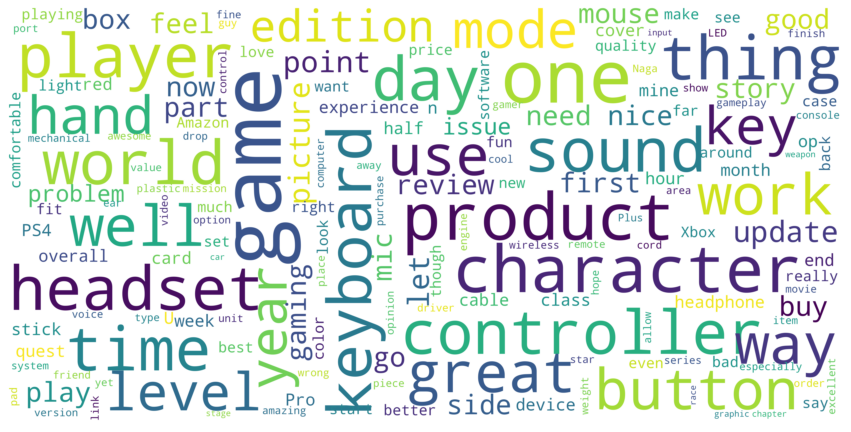

In [92]:
topic_words = [x.split(' ') for x in review_topic_matrix['topic_reviews'].astype(str)]
words_list = []

for x in topic_words:
    words_list.extend(x)
    
count_list = pd.Series(words_list).value_counts()

word_cloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30, random_state=20) \
                    .generate((count_list[count_list > 2])
                    .to_string())

plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [93]:
sentiment_matrix = review_topic_matrix

In [94]:
sentiment_matrix

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_reviews
19,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780,I've had a pair of these for a little over six...
296,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340,Looks great! Feels great!...I highly recommend it
1890,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000,We are absolutely in love with this Pyrus wire...
2573,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049,My TV inputs change on their own during gamepl...
3142,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507,I got DriveClub on 12/6 so my experience with ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198537,0.000000,0.001141,0.039285,0.000000,0.000000,0.000000,0.020762,0.000000,0.009607,0.000000,0.003922,0.004492,0.000000,0.000000,0.000000,"I can't connect my Sony xb950bt to it, does an..."
198575,0.000000,0.000594,0.006725,0.000000,0.001746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027987,0.025910,0.038593,0.000000,Poor! Just opened this gift I bought for my bo...
198734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055047,0.000000,0.000000,0.000000,0.000000,0.000000,0.002539,"I have received the k70 keyboard package,\nbut..."
199079,0.000000,0.372301,0.044884,0.000000,0.008704,0.011463,0.000000,0.000000,0.114133,0.004258,0.090490,0.020590,0.038825,0.236235,0.298418,I play WOW and ArcheAge and I was drawn to the...


In [95]:
sentiment_matrix['sentiment_score'] = reviews['sentiment_score']

In [96]:
sentiment_matrix.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_reviews,sentiment_score
19,0.016022,0.000000,0.375763,0.000000,0.324741,0.030782,0.083646,0.061217,0.010780,0.000000,0.000000,0.067551,0.022546,0.248217,0.109780,I've had a pair of these for a little over six...,3.875
296,0.000000,0.000557,0.000000,0.000000,0.022120,0.005942,0.000000,0.000000,0.019793,0.014293,0.025839,0.000000,0.039838,0.003907,0.012340,Looks great! Feels great!...I highly recommend it,0.625
1890,0.224459,0.000000,0.000000,0.011811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.905292,0.203201,0.000000,0.000000,0.000000,We are absolutely in love with this Pyrus wire...,8.750
2573,0.064030,0.005094,0.094800,0.033912,0.000000,0.003200,0.025379,0.000000,0.038773,0.017427,0.082150,0.141696,0.021485,0.052889,0.057049,My TV inputs change on their own during gamepl...,-1.375
3142,0.222830,0.017026,0.043904,0.012612,0.009755,0.047872,0.017518,0.082591,0.026336,0.000000,0.000000,0.120994,0.107873,0.066161,0.017507,I got DriveClub on 12/6 so my experience with ...,6.250


In [97]:
sentiment_matrix.sample(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_reviews,sentiment_score
42657,0.000148,0.000000,0.037059,0.008978,0.009701,0.000000,0.000000,0.000000,0.015749,0.000151,0.042590,0.018851,0.000000,0.041205,0.025794,"Shoddy build quality, a stiff cable that keeps...",-2.250
57004,0.000000,0.000000,0.000000,0.000000,0.019029,0.000000,0.000000,0.000000,0.000000,0.000000,1.248308,0.140425,0.000000,0.000000,0.000000,So I had already bought a DualShock 4 controll...,0.750
112688,0.010009,0.152527,0.059070,0.000000,0.080772,0.041671,0.091880,0.028524,2.186464,0.019770,0.000000,0.040011,0.000000,0.292755,0.000000,First off let me say that I own both the Razer...,2.875
139524,0.069236,0.000000,0.000000,0.000000,0.000000,0.042486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Best sim game!!!,0.750
12958,0.076919,0.000000,0.040059,0.000000,0.129390,0.000000,0.000000,0.000000,0.000000,0.015908,0.105252,0.000000,0.000000,0.000000,0.000000,The headset is on the cheaper end of the spect...,-1.500
193312,0.000000,0.002409,0.003239,0.003044,0.000636,0.000000,0.000000,0.000000,0.001861,0.000000,0.017231,0.000000,0.025054,0.004118,0.000000,These do not fit the DS4 very well. They are a...,-0.375
83533,0.000000,0.000000,0.002040,0.000000,0.072818,0.000000,0.000000,0.000000,0.010566,0.000000,0.000000,0.000000,0.043492,0.134093,0.000000,"Great headset im loving it, i would have gave ...",1.250
146992,0.059323,0.000996,0.000000,0.023243,0.000000,0.029937,0.000000,0.027429,0.008617,0.013464,0.012966,0.001391,0.091224,0.098546,0.000000,I bought this for my brothers New Nintendo 3DS...,1.750
33659,0.813524,0.000000,0.000000,0.001941,0.000000,0.022155,0.131521,0.105483,0.172861,0.039712,0.014420,0.039440,0.000000,0.614949,0.059229,Like its predecessor I found this sequel to be...,12.375
34419,0.054822,0.000000,0.000000,0.000000,5.514855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Razer makes great gaming accessories. My teen ...,19.750


In [98]:
import seaborn as sns

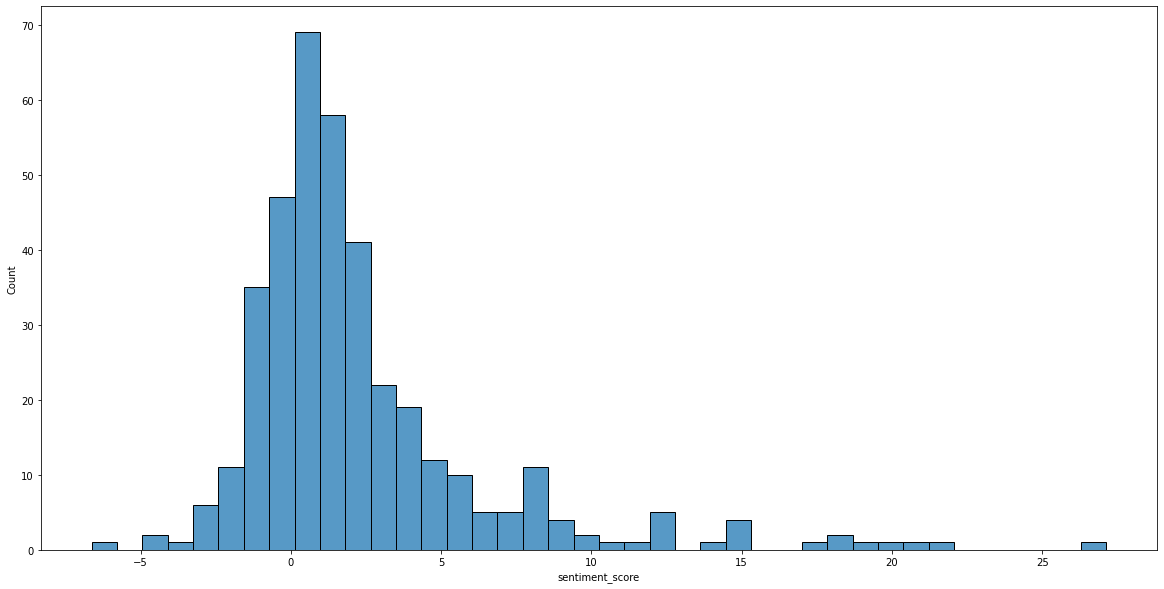

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='sentiment_score', data=sentiment_matrix, ax=ax)
plt.show()

In [100]:
sentiment_matrix['sentiment'] = sentiment_matrix['sentiment_score'].apply(lambda x: 'positive' if x > 1 else ('negative' if x < 0.5 else 'neutral'))

In [101]:
sentiment_matrix['sentiment'].value_counts()

positive    204
negative    133
neutral      44
Name: sentiment, dtype: int64

In [102]:
sentiment_matrix['overall'] = reviews['overall']

AttributeError: module 'matplotlib.pyplot' has no attribute 'shot'

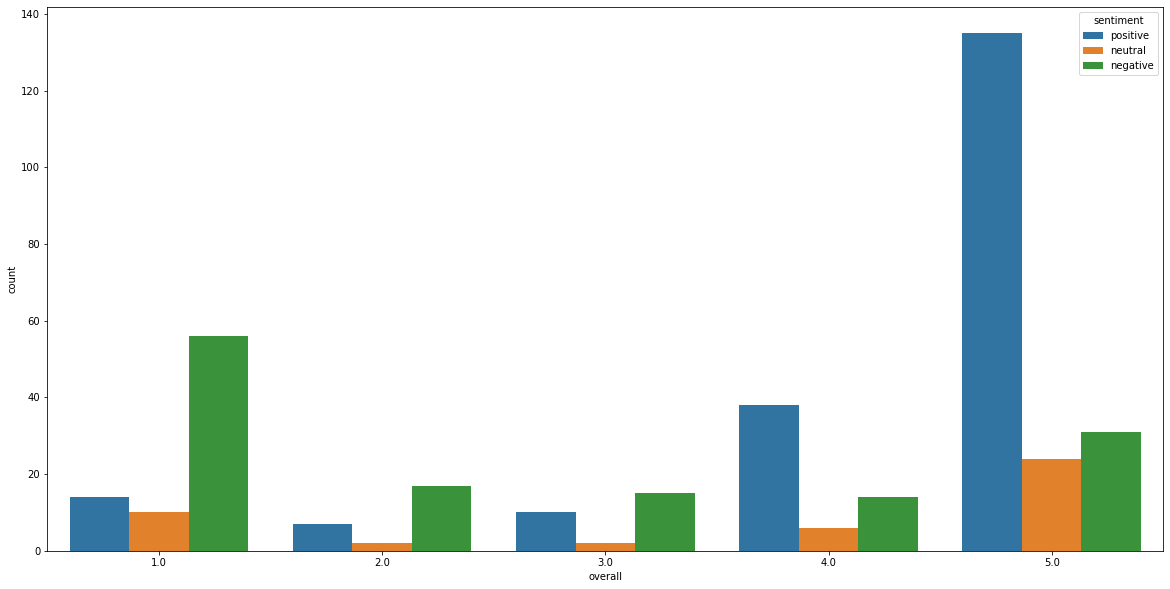

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.countplot(x='overall', hue='sentiment', data=sentiment_matrix)
plt.shot()

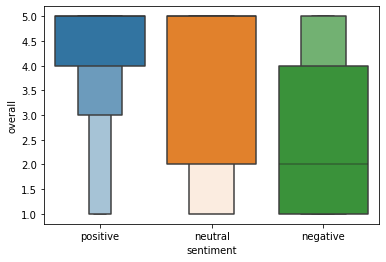

In [104]:
sns.boxenplot(x='sentiment', y='overall', data=sentiment_matrix);

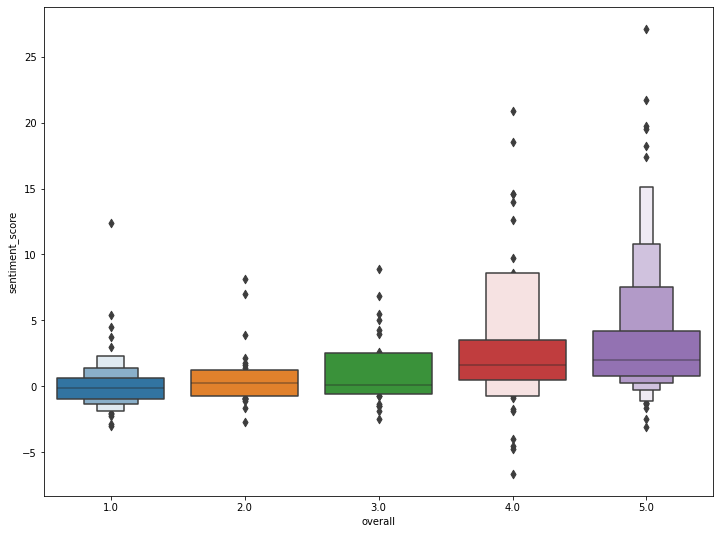

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,9))
sns.boxenplot(x='overall', y='sentiment_score', data=sentiment_matrix, ax=ax)
plt.show()

In [106]:
sentiment_matrix['true_sentiment'] = sentiment_matrix['overall'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))

In [107]:
sentiment_matrix.sample(5)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_reviews,sentiment_score,sentiment,overall,true_sentiment
26283,0.049850,0.000000,0.000000,0.000000,0.000000,0.004447,0.000000,0.026767,0.053845,0.000000,0.017282,0.000000,0.000000,0.311888,0.000000,"I really like these grips, I feel like it give...",1.375,positive,4.0,positive
65337,0.535428,0.000000,0.000000,0.000000,0.039422,0.009916,0.081584,0.000000,0.000000,0.020837,0.322983,0.046322,0.000000,0.000000,0.000000,Okay there seems to be a lot of confusion on t...,1.125,positive,5.0,positive
29301,0.000000,0.002251,0.002867,0.012356,0.000000,0.000000,0.000000,0.018857,0.000000,0.008967,0.013575,0.000000,0.058683,0.000000,0.000000,Got it quick sadly not an online code but it s...,-1.375,negative,5.0,positive
168191,0.000000,0.349194,0.022564,0.000000,0.000000,0.012119,0.000000,0.000000,0.000000,0.000000,0.020925,0.024085,0.000000,0.139419,0.019069,Description says battery life lasts a month......,2.000,positive,1.0,negative
24055,0.333202,0.000000,0.000000,1.146652,0.017399,0.000000,0.432912,0.000000,0.000000,0.131383,0.000000,0.000000,0.000000,1.864691,0.150232,"Pros:\n\nEver wanted to get a game, but you di...",12.000,positive,5.0,positive


In [108]:
y_sentiment_pred = sentiment_matrix['sentiment'].tolist()
y_true = sentiment_matrix['true_sentiment'].tolist()

In [110]:
y_sentiment_pred

['positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative'

In [112]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_sentiment_pred)

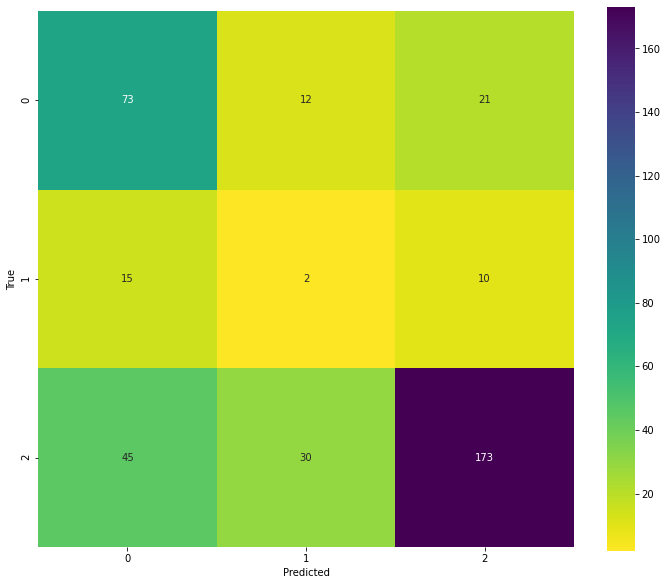

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

LDA

In [115]:
from sklearn.decomposition import LatentDirichletAllocation

In [114]:
doc_term_data

<381x6558 sparse matrix of type '<class 'numpy.int64'>'
	with 25100 stored elements in Compressed Sparse Row format>

In [116]:
lda_tf = LatentDirichletAllocation(n_components=15, random_state=20)
lda_tf.fit(doc_term_data)

LatentDirichletAllocation(n_components=15, random_state=20)

In [119]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

p = pyLDAvis.sklearn.prepare(lda_tf, doc_term_data, vectorizer)
pyLDAvis.save_html(p, 'lda.html')

In [120]:
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.110928  0.005666       1        1  17.242147
14    -0.204245 -0.066759       2        1  11.467023
0     -0.054858 -0.057981       3        1  11.119993
10     0.046805 -0.096941       4        1   9.929230
1      0.028354 -0.057613       5        1   8.301731
13     0.043301 -0.076189       6        1   6.893726
8      0.001920 -0.081073       7        1   6.202541
12     0.042875  0.037612       8        1   6.146956
4     -0.028690  0.045826       9        1   5.645494
7      0.090269 -0.003866      10        1   4.529874
3      0.111334 -0.049306      11        1   4.123987
6     -0.068290  0.129454      12        1   3.338078
2     -0.023131  0.095069      13        1   2.583189
9      0.035523  0.106731      14        1   1.702346
5      0.089760  0.069371      15        1   0.773682, topic_info=            Term        Freq       Total Category  logprob  loglift
3817       mouse  248.000000  248.000000  Default  30.0000  30.0000
2500        game  478.000000  478.000000  Default  29.0000  29.0000
3223    keyboard   93.000000   93.000000  Default  28.0000  28.0000
2773  headphones   77.000000   77.000000  Default  27.0000  27.0000
2774     headset  102.000000  102.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
2740        hard    0.785927   45.143148  Topic15  -5.8211   0.8110
1939     edition    0.781236   44.134305  Topic15  -5.8271   0.8276
819       bought    0.799749   55.623398  Topic15  -5.8036   0.6197
2511       games    0.799749  127.529151  Topic15  -5.8036  -0.2100
2647       great    0.799749  160.413467  Topic15  -5.8036  -0.4394

[1042 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         2  0.844241    000
11        1  0.298995     10
11        2  0.186872     10
11        3  0.018687     10
11        4  0.149498     10
...     ...       ...    ...
6539      3  0.918746     yr
6545      8  0.188703   zero
6545     10  0.188703   zero
6545     12  0.566110   zero
6547     12  0.908728  zeros

[2735 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 15, 1, 11, 2, 14, 9, 13, 5, 8, 4, 7, 3, 10, 6])

/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jasonwintery/opt/anaconda3/envs/metis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Use